## Observations and Insights 

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display head preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [50]:
# Checking the number of mice in the DataFrame.
number_of_mice = combined_data[['Mouse ID']]
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
mice_df = number_of_mice.drop_duplicates(keep='first')

mice_count = mice_df['Mouse ID'].count()
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Checking the number of mice in the clean DataFrame.
total_mice_df = pd.DataFrame({'Number of Unique Mice':[mice_count]})
total_mice_df

,Number of Unique Mice
0,249


## Summary Statistics

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_grouped = combined_data.groupby(['Drug Regimen'])
regimen_grouped

regimen_mean = regimen_grouped['Tumor Volume (mm3)'].mean()
regimen_median = regimen_grouped['Tumor Volume (mm3)'].median()
regimen_variance = regimen_grouped['Tumor Volume (mm3)'].var()
regimen_std = regimen_grouped['Tumor Volume (mm3)'].std()
regimen_sem = regimen_grouped['Tumor Volume (mm3)'].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = pd.DataFrame({'Mean': regimen_mean, 
                                   'Median': regimen_median, 
                                   'Variance': regimen_variance, 
                                   'Standard Deviation': regimen_std, 
                                   'SEM': regimen_sem})
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

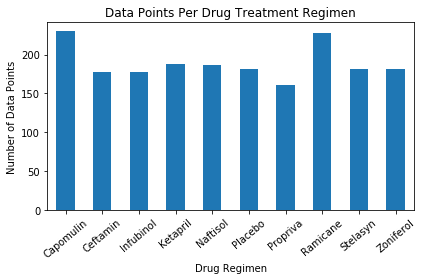

In [53]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mouse_time = combined_data.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
mouse_time_df = pd.DataFrame(mouse_time)

mouse_time_df.plot.bar(legend=False, rot=40)
plt.ylabel('Number of Data Points')
plt.title('Data Points Per Drug Treatment Regimen')
mouse_time_df
plt.tight_layout()
plt.savefig('Barplot1')
plt.show()

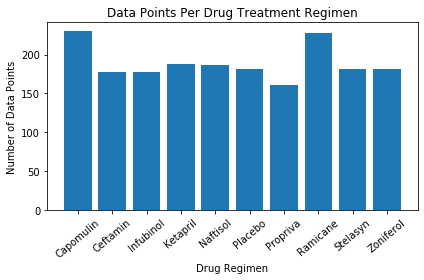

In [54]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mouse_time))
tick_locations = [x for x in x_axis]
plt.figure(figsize=(6,4))

reset_mouse_time_df = mouse_time_df.reset_index()

plt.bar(x_axis, mouse_time_df['Tumor Volume (mm3)'])
plt.xticks(tick_locations, reset_mouse_time_df['Drug Regimen'], rotation="40")

plt.title('Data Points Per Drug Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.tight_layout()
plt.savefig('BarPlot_2')
plt.show()

## Pie Plots

In [55]:
gender_data = mouse_metadata.groupby('Sex').count()
gender_data

,Mouse ID,Drug Regimen,Age_months,Weight (g)
Sex,,,,
Female,124,124,124,124
Male,125,125,125,125


In [56]:
labels = [mouse_metadata['Sex'].unique()]
newlist = list(gender_data.index)
newlist

['Female', 'Male']

In [57]:
gender_size = gender_data['Mouse ID']
gender_size

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

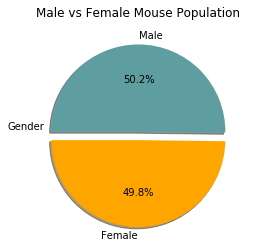

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['orange', '#5F9EA0']
explode = (0.1, 0)
plt.pie(gender_size, 
        labels=newlist, 
        colors=colors, 
        autopct="%1.1f%%", 
        shadow=True, 
        startangle=180, 
        explode=explode)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Gender', rotation=360)
plt.savefig('PieChart_Mouse_Gender1')
plt.show()

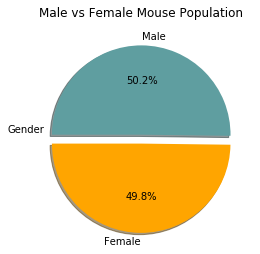

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
secondpie = gender_data["Mouse ID"].plot.pie(y='gender_size', 
                                             colors=colors, 
                                             figsize=(4, 5), 
                                             autopct="%1.1f%%",
                                             startangle=180,
                                             shadow=True,
                                             explode=explode)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Gender', rotation=360)
plt.savefig('PieChart_Mouse_Gender2')
plt.show()

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

top_regimen = combined_data[combined_data['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_regimen = top_regimen.sort_values(['Timepoint'], ascending=True)
top_regimen

top_regimen_data = top_regimen[['Drug Regimen', 'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
top_regimen_data


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [61]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
top_regimen_sort = top_regimen_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']

#Made into dataframe with .to_frame()
top_regimen_df = top_regimen_sort.to_frame()
final_df = top_regimen_df.reset_index()
final_df

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
95,Ramicane,s508,30.276232
96,Ramicane,u196,40.667713
97,Ramicane,w678,43.166373
98,Ramicane,y449,44.183451


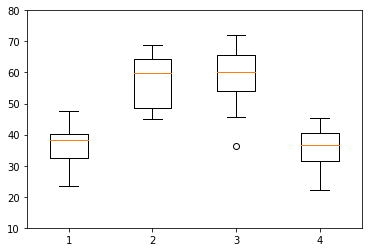

In [62]:
#Shows groupby top drug regimen
tumor_list = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_list)
tumor_volume = [x for x in tumor_list_df['Tumor Volume (mm3)']]

plt.boxplot(tumor_volume)
plt.ylim(10,80)
plt.savefig('Boxplot')
plt.show()

## Line and Scatter Plots

In [63]:
# Generate a line plot of time point versus tumor volume for a mouse (close mouse 'i738' ) treated with Capomulin
capomulin_df = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
forline_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "i738",:]
forline_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
195,i738,Capomulin,Female,23,20,0,45.000000,0
196,i738,Capomulin,Female,23,20,5,45.595685,0
197,i738,Capomulin,Female,23,20,10,43.421014,0
198,i738,Capomulin,Female,23,20,15,37.978778,0
199,i738,Capomulin,Female,23,20,20,38.531136,0


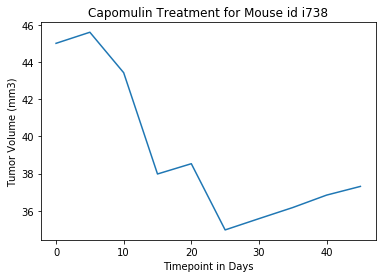

In [64]:
x_axis_timepoint = forline_df['Timepoint']
tumor_size = forline_df['Tumor Volume (mm3)']

plt.plot(x_axis_timepoint, tumor_size)
plt.xlabel('Timepoint in Days')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment for Mouse id i738')
plt.savefig('Mouse_LineChart_Capomulin_i738')
plt.show()

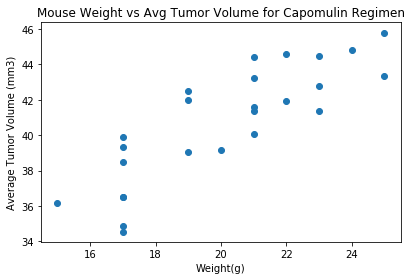

In [65]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_average = capomulin_df.groupby(['Mouse ID']).mean()
capomulin_average
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Avg Tumor Volume for Capomulin Regimen')
plt.tight_layout()
plt.savefig('Scatter_Plot_Weight_TumorVolume')
plt.show()

## Correlation and Regression

In [66]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(sem.pearsonr(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between the mouse weight and average tumor volume is '{corr}'.")

The correlation between the mouse weight and average tumor volume is '0.84'.


In [67]:
model = sem.linregress(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [68]:
mslope = 0.9544396890241045
bintercept = 21.552160532685015

In [69]:
y_values = capomulin_average['Weight (g)']*mslope+bintercept

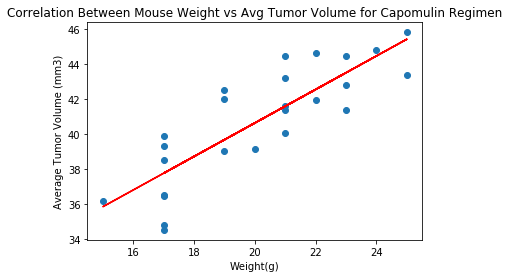

In [70]:
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'], y_values, color='red')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Correlation Between Mouse Weight vs Avg Tumor Volume for Capomulin Regimen')
plt.savefig('Mouse_Weight_TumorVolume_Regression')
plt.show()